Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/upGrad/CNN_assignment.zip

unzip:  cannot find or open gdrive/CXR_data_UpGrad.zip, gdrive/CXR_data_UpGrad.zip.zip or gdrive/CXR_data_UpGrad.zip.ZIP.


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (180, 180)


Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##val_ds = ##todo

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt
import glob


### your code goes here, you can use training or validation data to visualize

In [ ]:
path=glob.glob(str(data_dir_train)+'/*')
path

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis']

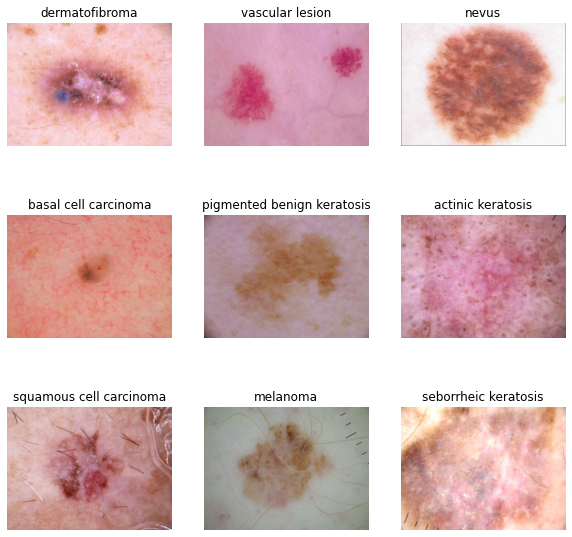

In [ ]:
import matplotlib.image as mpimg
index=0
plt.figure(figsize=(10, 10))

for each_path in path:
    images=glob.glob(each_path+'*/*.jpg')
    #print(images[0])
    ax = plt.subplot(3, 3, index + 1)
    img = mpimg.imread(images[0])
    plt.imshow(img)
    plt.title(os.path.basename(each_path))
    plt.axis("off")
    index+=1

    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers


In [ ]:
image_size + (3,)

(180, 180, 3)

In [ ]:
num_classes=9

In [ ]:

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 98ms/step - loss: 2.0555 - accuracy: 0.2416 - val_loss: 1.9725 - val_accuracy: 0.2349
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6866 - accuracy: 0.3811 - val_loss: 1.5423 - val_accuracy: 0.4653
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.4419 - accuracy: 0.4855 - val_loss: 1.4210 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 1.3228 - accuracy: 0.5285 - val_loss: 1.5537 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2324 - accuracy: 0.5714 - val_loss: 1.3554 - val_accuracy: 0.5459
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1596 - accuracy: 0.5820 - val_loss: 1.3728 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.0450 - accuracy: 0.6250 - val_loss: 1.4393 - val_accuracy: 0.5436
Epoch 8/20
5

### Visualizing training results

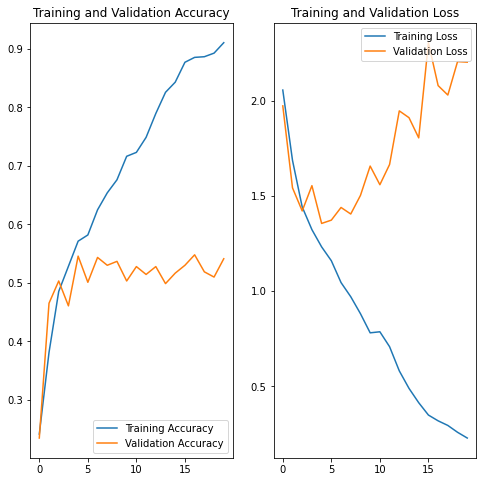

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The training accuracy is increasing  over epochs with 84%, whereas validation accuracy is around 79% in the training process. The trained data is overfitting, as with increase in training accuracy the validation accuracy isnt increasing much,
There is huge gap in training accuracy and validation accuracy , it shows the model is overfitting

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation= keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

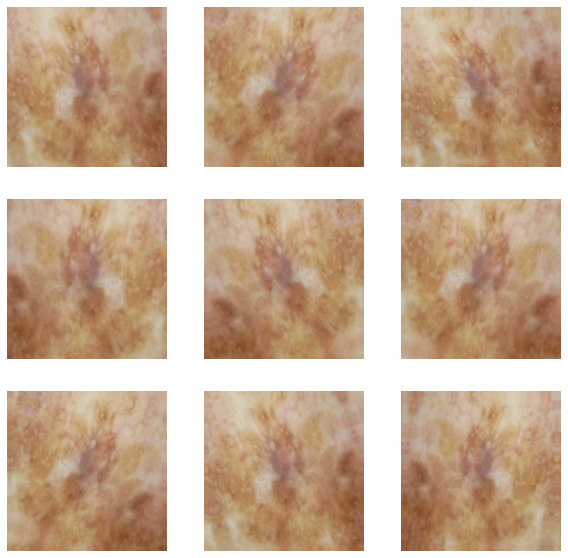

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off");

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 50ms/step - loss: 2.0488 - accuracy: 0.2461 - val_loss: 1.9060 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 3s 47ms/step - loss: 1.7963 - accuracy: 0.3276 - val_loss: 1.6684 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5797 - accuracy: 0.4542 - val_loss: 1.6074 - val_accuracy: 0.4206
Epoch 4/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5061 - accuracy: 0.4632 - val_loss: 1.4259 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 1.4145 - accuracy: 0.4978 - val_loss: 1.4753 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3955 - accuracy: 0.5073 - val_loss: 1.4488 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3408 - accuracy: 0.5201 - val_loss: 1.4189 - val_accuracy: 0.5213
Epoch 8/20
56

### Visualizing the results

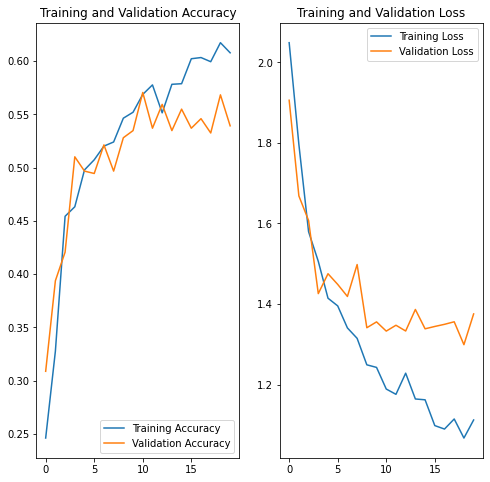

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The graph shows the training accuracy falling to 60% and validation accuracy as well dropping to 59% , this shows the model has starting underfitting with accuracy dropped at training

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

from glob import  glob
path_list = [ x for x in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0028790.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030427.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033847.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0031344.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030665.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030011.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029248.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025903.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030321.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/

In [ ]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
lesion_list

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [ ]:
len(lesion_list)
type(lesion_list)

list

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0028790.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030427.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033847.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0031344.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030665.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0030011.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029248.jpg': 'dermatofibroma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025903.jpg': 'dermatofibroma',
 'Skin cancer ISIC The I

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns= ['Path', 'Label'])
original_df.shape

(2239, 2)

In [ ]:
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
1,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
3,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


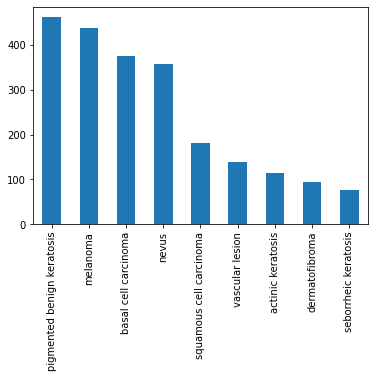

In [ ]:
original_df['Label'].value_counts().plot.bar()


In [ ]:
tempdf=pd.DataFrame(original_df['Label'].value_counts())
tempdf


,Label
pigmented benign keratosis,462
melanoma,438
basal cell carcinoma,376
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77


In [ ]:
total=tempdf['Label'].sum()
total


2239

In [ ]:
tempdf['percent']=(tempdf['Label']/total)*100

tempdf

,Label,percent
pigmented benign keratosis,462,20.634212
melanoma,438,19.562305
basal cell carcinoma,376,16.793211
nevus,357,15.944618
squamous cell carcinoma,181,8.083966
vascular lesion,139,6.208129
actinic keratosis,114,5.091559
dermatofibroma,95,4.242966
seborrheic keratosis,77,3.439035


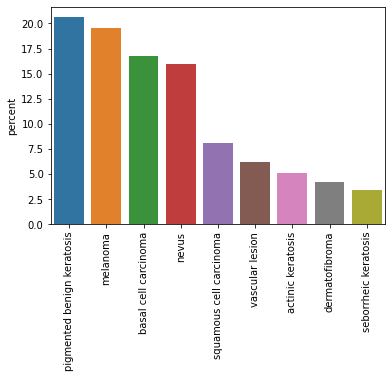

In [ ]:
import seaborn as sns
plt.xticks(rotation = 'vertical')

sns.barplot(x=tempdf.index, y='percent', data=tempdf)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
As plotted in graph above seborrheic keratosis	has least samples
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis	dominate with maximum number of samples 



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8435188E50>:   0%|          | 1/500 [00:00<01:05,  7.67 Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F843068F590>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8435218DD0>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8434F36290>:   1%|          | 3/500 [00:00<00:52,  9.48 Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8434F2C490>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8430706190>: 100%|██████████| 500/500 [01:55<00:00,  4.34 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F84E3FC5F50>: 100%|██████████| 500/500 [01:31<00:00,  5.46 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F843070A4D0>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F84359E9D10>: 100%|██████████| 500/500 [00:47<00:00, 10.61 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F843061AAD0>:   1%|          | 4/500 [00:00<01:12,  6.82 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8430625410>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F849A903BD0>: 100%|██████████| 500/500 [00:19<00:00, 25.85 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031735.jpg_0f1787c5-9ba4-4e9c-a933-061924d08f49.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030757.jpg_7a2ab4ac-abfc-4f77-91de-80aaab04a322.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028651.jpg_df524636-5ece-4afc-b3b3-533c7e37d8f8.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0032642.jpg_45d9468f-37ff-48a3-bb5f-be486f65b2eb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029297.jpg_f908c00f-81ec-4240-9a89-1578970ffd8e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

KeyboardInterrupt: ignored

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



As seen from the plot , the training accuracy and validation accuracy is converging . The gap is reduced which shows the model is performing well after treating imbalance .We get a training accuray of 87% and validation accuracy of 82%  after running through 50 epochs, which shows it a good fit model.
This indicates fixing class imbalance issue, has help to get better accuracy on train and validations set